<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Исследовательский анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Аналитика

**Описание данных**

Таблица `Файл 2.xlsx` - выгрузка по заявкам клиентов с причинами отказа и параметрами клиентов.

**Задания**

* Как распределяет поток клиентов по каналам оформления заявки?  
* Какие клиенты в основном заводят заявки в партнерском канале, можно ли выделить «портрет основного клиента»?  
* Играет ли роль возраст клиента в зависимости от канала оформления заявки?  
* Какой из каналов генерирует меньше всех положительных заявок?  
* Какая самая популярная причина отказа по заявкам?  
* Можете выделить еще какие-то интересные факты по выгрузке (необязательно)?

## Изучение данных из файла

Импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными `Файл 2.xlsx` и изучим общую информацию:

In [2]:
df = pd.read_excel('/datasets/Файл 2.xlsx')
df

,Ид заявки,Дата заявки,Канал оформления,Статус по заявке,Причина отказа,Возраст клиента,Пол клиента
0,1,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,32,Женский
1,2,2022-11-01,Сайт Банка,ОТКАЗ,Скор,40,Мужской
2,3,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,28,Мужской
3,4,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,23,Мужской
4,5,2022-11-01,Офис,ОТКАЗ,БКИ,35,Мужской
...,...,...,...,...,...,...,...
1168,1169,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,25,Женский
1169,1170,2022-11-20,Сайт Банка,ОТКАЗ,Лимит,42,Женский
1170,1171,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,23,Женский
1171,1172,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,24,Женский


In [3]:
df.shape

(1173, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ид заявки         1173 non-null   int64         
 1   Дата заявки       1173 non-null   datetime64[ns]
 2   Канал оформления  1173 non-null   object        
 3   Статус по заявке  1173 non-null   object        
 4   Причина отказа    775 non-null    object        
 5   Возраст клиента   1173 non-null   int64         
 6   Пол клиента       1173 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 64.3+ KB


In [5]:
df['Причина отказа'].isna().mean()

0.3393009377664109

Есть 398 пропусков в столбце "Причина отказа". Они составляют примерно 34%.

Посмотрим, какие есть причины отказа:

In [6]:
df['Причина отказа'].value_counts()

БКИ      464
Лимит    174
Скор     137
Name: Причина отказа, dtype: int64

Посмотрим, какие есть статусы по заявкам:

In [7]:
df['Статус по заявке'].value_counts()

ОТКАЗ        775
ЕСТЬ ОФЕР    398
Name: Статус по заявке, dtype: int64

Пропуски в столбце `Причина отказа` есть у тех клиентов, которые получили оффер.

**Вывод:**
1) Датафрейм состоит из 1173 наблюдений и 7 полей.  
2) В столбце `Причина отказа` есть пропущенные значения. Выяснили, что причина отказа не указана только у тех клиентов, которые получили оффер.

## Исследовательский анализ данных

**1) Посмотрим, как распределен поток клиентов по каналам оформления заявки.**

Выясним, какие каналы оформления заявок у нас есть:

In [8]:
df['Канал оформления'].unique()

array(['Сайт Банка', 'Офис', 'Партнерский канал'], dtype=object)

Всего у нас 3 канала: сайт банка, офис и партнерский канал.

Посмотрим, какое количество клиентов приходит с каждого канала:

In [9]:
df_channel = df.groupby('Канал оформления')['Ид заявки'].count().reset_index()
df_channel = df_channel.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_channel

,Канал оформления,Количество заявок
2,Сайт Банка,559
0,Офис,489
1,Партнерский канал,125


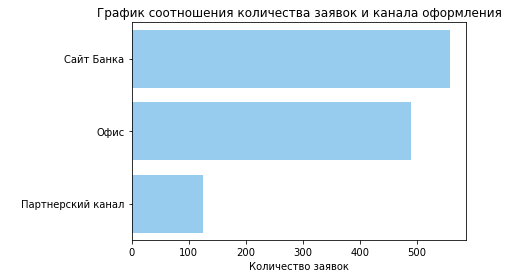

In [10]:
sns.barplot(x='Количество заявок', y='Канал оформления', data=df_channel, color='#89CFFD')
plt.title('График соотношения количества заявок и канала оформления')
plt.ylabel(' ')
plt.xlabel('Количество заявок')
plt.show()

**Вывод:**  
Есть 3 вида каналов оформления заявок: сайт банка, офис и партнерский канал. Больше всего заявок пришло с сайта банка (559). Меньше всего с партнерского канала (125).

**2) Определим, какие клиенты в основном заводят заявки в партнерском канале. Составим портрет "основного клиента".**

In [11]:
df_partner = df.query('`Канал оформления` == "Партнерский канал"')
df_partner

,Ид заявки,Дата заявки,Канал оформления,Статус по заявке,Причина отказа,Возраст клиента,Пол клиента
44,45,2022-11-01,Партнерский канал,ЕСТЬ ОФЕР,NaN,41,Мужской
48,49,2022-11-01,Партнерский канал,ОТКАЗ,БКИ,26,Женский
70,71,2022-11-01,Партнерский канал,ОТКАЗ,БКИ,37,Женский
77,78,2022-11-01,Партнерский канал,ОТКАЗ,Лимит,45,Мужской
87,88,2022-11-02,Партнерский канал,ЕСТЬ ОФЕР,NaN,60,Мужской
...,...,...,...,...,...,...,...
1126,1127,2022-11-19,Партнерский канал,ЕСТЬ ОФЕР,NaN,56,Мужской
1143,1144,2022-11-20,Партнерский канал,ОТКАЗ,БКИ,48,Женский
1148,1149,2022-11-20,Партнерский канал,ОТКАЗ,Скор,25,Мужской
1152,1153,2022-11-20,Партнерский канал,ОТКАЗ,Лимит,38,Мужской


Всего 125 заявок по партнерскому каналу.

Посмотрим на распределение клиентов по возрасту:

In [12]:
df_partner_age = df_partner.groupby('Возраст клиента')['Ид заявки'].count().reset_index()
df_partner_age = df_partner_age.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_partner_age.head()

,Возраст клиента,Количество заявок
15,38,16
7,30,11
20,43,8
13,36,7
26,49,7


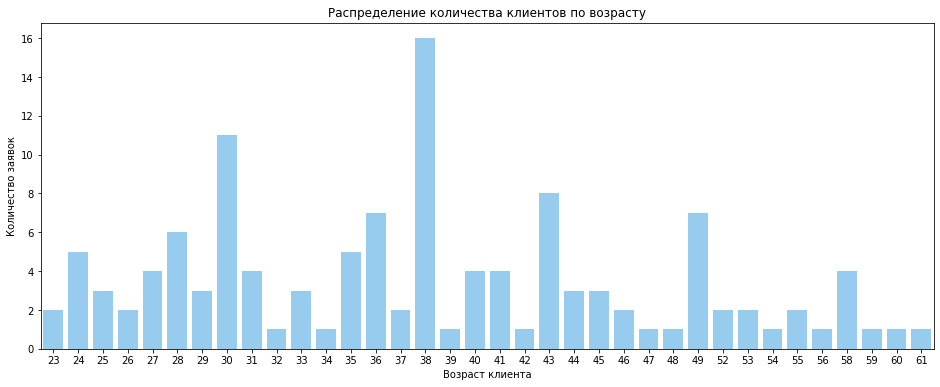

In [13]:
plt.figure(figsize=(16, 6))
plt.title('Распределение количества клиентов по возрасту')
sns.barplot(data=df_partner_age, x='Возраст клиента', y='Количество заявок', color='#89CFFD')
plt.show()

Больше всего клиентов (16) в возрасте 38 лет приходит с партнерского канала.

Посмотрим на распределение клиентов по полу:

In [14]:
df_partner_gender = df_partner.groupby('Пол клиента')['Ид заявки'].count().reset_index()
df_partner_gender = df_partner_gender.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_partner_gender['Доля заявок'] = df_partner_gender['Количество заявок']/df_partner['Ид заявки'].count()
df_partner_gender

,Пол клиента,Количество заявок,Доля заявок
1,Мужской,72,0.576
0,Женский,53,0.424


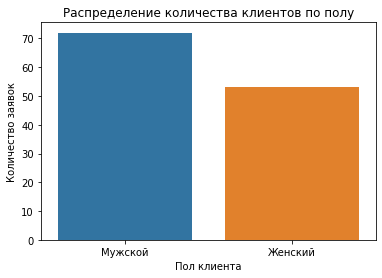

In [15]:
plt.title('Распределение количества клиентов по полу')
sns.barplot(data=df_partner_gender, x='Пол клиента', y='Количество заявок')
plt.show()

Доля мужчин немного больше (0.576), чем женщин (0.424).

In [16]:
df_partner_status = df_partner.groupby('Статус по заявке')['Ид заявки'].count().reset_index()
df_partner_status = df_partner_status.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_partner_status

,Статус по заявке,Количество заявок
0,ЕСТЬ ОФЕР,69
1,ОТКАЗ,56


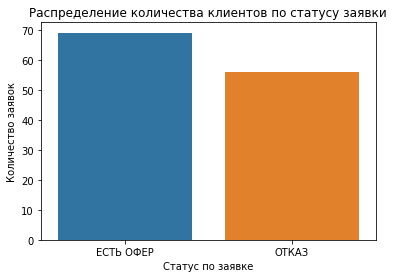

In [17]:
plt.title('Распределение количества клиентов по статусу заявки')
sns.barplot(data=df_partner_status, x='Статус по заявке', y='Количество заявок')
plt.show()

Клиентов с офферами больше (69), чем с отказами (56 человек).

In [18]:
df_partner_refusal = df_partner.groupby('Причина отказа')['Ид заявки'].count().reset_index()
df_partner_refusal = df_partner_refusal.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_partner_refusal

,Причина отказа,Количество заявок
0,БКИ,27
2,Скор,15
1,Лимит,14


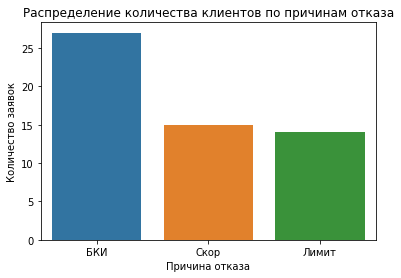

In [19]:
plt.title('Распределение количества клиентов по причинам отказа')
sns.barplot(data=df_partner_refusal, x='Причина отказа', y='Количество заявок')
plt.show()

Больше всего отказов по причине БКИ.

**Вывод:**  
Таким образом, можем составить портрет наиболее типичного клиента для партнерского канала. Это мужчина 38 лет с оффером. Если всё-таки статус заявки "отказ", то ее причиной чаще всего будет БКИ.

**3) Выясним, играет ли роль возраст клиента в зависимости от канала оформления заявки.**

Посмотрим, как распределен возраст клиентов по каналу оформления:

In [20]:
df_age = df.groupby(['Канал оформления', 'Возраст клиента'])['Ид заявки'].count().reset_index()
df_age = df_age.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
df_age

,Канал оформления,Возраст клиента,Количество заявок
82,Сайт Банка,23,31
84,Сайт Банка,25,29
87,Сайт Банка,28,29
86,Сайт Банка,27,28
89,Сайт Банка,30,27
...,...,...,...
71,Партнерский канал,48,1
75,Партнерский канал,54,1
77,Партнерский канал,56,1
79,Партнерский канал,59,1


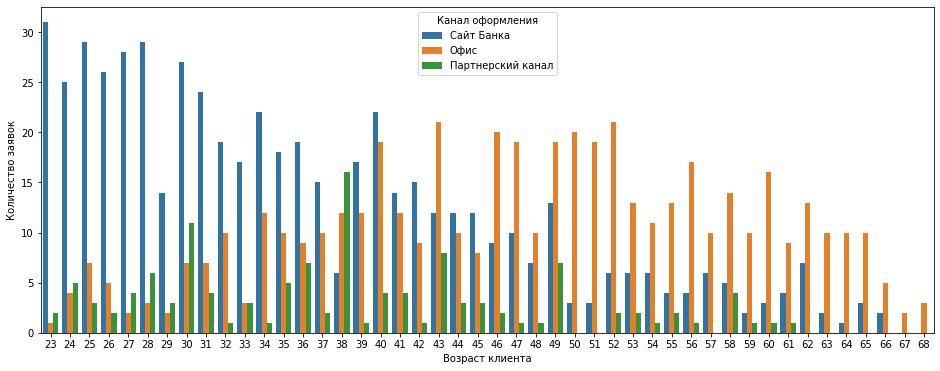

In [21]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_age, x='Возраст клиента', y='Количество заявок', hue='Канал оформления')
plt.show()

**Вывод:**  
Возраст клиента играет роль в зависимости от канала оформления заявки. Клиенты в возрасте до 40 лет предпочитают оставлять заявки на сайте банка, больше всего заявок оставляют на сайте люди в возрасте от 23 до 28 лет. В офисе больше всего оставляют заявки клиенты в возрасте от 40 до 60 лет. Максимум партнерского канала приносят клиенты в возрасте 38 лет.

**4) Определим, какой из каналов генерирует меньше всех положительных заявок.**

Посмотрим общее количество заявок по каждому каналу:

In [22]:
data = df.groupby('Канал оформления')['Ид заявки'].count().reset_index()
data = data.rename(columns={'Ид заявки':'Количество заявок'}).sort_values(by='Количество заявок', ascending=False)
data

,Канал оформления,Количество заявок
2,Сайт Банка,559
0,Офис,489
1,Партнерский канал,125


Больше всего заявок пользователи оставляют на сайте банка.

Теперь выделим только те заявки, по которым клиенты получили отказ:

In [23]:
refusal = df.query('`Статус по заявке` == "ОТКАЗ"')
refusal

,Ид заявки,Дата заявки,Канал оформления,Статус по заявке,Причина отказа,Возраст клиента,Пол клиента
0,1,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,32,Женский
1,2,2022-11-01,Сайт Банка,ОТКАЗ,Скор,40,Мужской
2,3,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,28,Мужской
3,4,2022-11-01,Сайт Банка,ОТКАЗ,БКИ,23,Мужской
4,5,2022-11-01,Офис,ОТКАЗ,БКИ,35,Мужской
...,...,...,...,...,...,...,...
1168,1169,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,25,Женский
1169,1170,2022-11-20,Сайт Банка,ОТКАЗ,Лимит,42,Женский
1170,1171,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,23,Женский
1171,1172,2022-11-20,Сайт Банка,ОТКАЗ,БКИ,24,Женский


In [24]:
df_refusal = refusal.groupby(['Канал оформления', 'Статус по заявке'])['Ид заявки'].count().reset_index()
df_refusal = df_refusal.rename(columns={'Ид заявки':'Количество отказов'}).sort_values(by='Количество отказов', ascending=False)
df_refusal['Доля отказов'] = round(df_refusal['Количество отказов'] / data['Количество заявок'], 2)
df_refusal

,Канал оформления,Статус по заявке,Количество отказов,Доля отказов
2,Сайт Банка,ОТКАЗ,488,0.87
0,Офис,ОТКАЗ,231,0.47
1,Партнерский канал,ОТКАЗ,56,0.45


**Вывод:**  
Больше всего отказов получают пользователи, оставляющие заявку на сайте банка. Доля таких клиентов 0.87. По двум другим каналам доли отказов примерно одинаковые (0.47 и 0.45).

**5) Узнаем самую популярную причину отказа по заявкам.**

In [25]:
df['Причина отказа'].value_counts()

БКИ      464
Лимит    174
Скор     137
Name: Причина отказа, dtype: int64

**Вывод:**  
Самая популярная причина отказа - это БКИ.

**6) Дополнительное исследование**

Определим, за какой срок у нас есть заявки:

In [26]:
min_data = df['Дата заявки'].min()
max_data = df['Дата заявки'].max()

print('Минимальная дата привлечения пользователей', min_data)
print('Максимальная дата привлечения пользователей', max_data)

Минимальная дата привлечения пользователей 2022-11-01 00:00:00
Максимальная дата привлечения пользователей 2022-11-20 00:00:00


У нас есть данные с 1 по 20 ноября 2022.

Посмотрим, как распределилось количество заявок по датам:

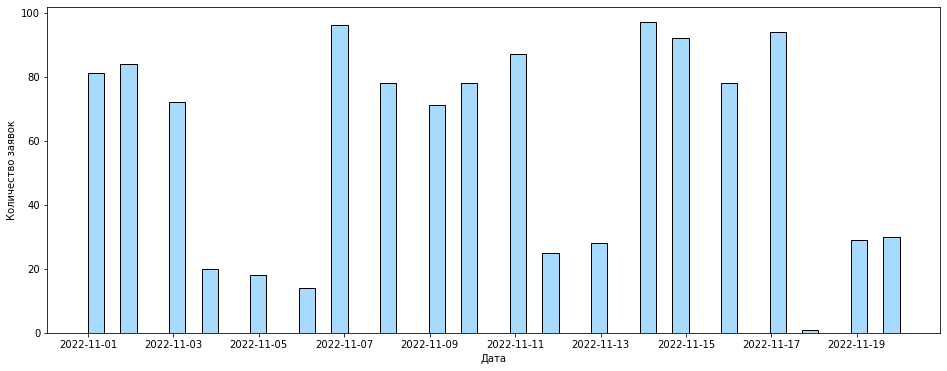

In [27]:
plt.figure(figsize=(16, 6))
sns.histplot(df['Дата заявки'], color='#89CFFD', bins=50)
plt.xlabel('Дата')
plt.ylabel('Количество заявок')
plt.show()

Видим, что подача заявок неравномерная. Наибольшая активность подачи заявок наблюдалась с 1 по 3, с 7 по 11 и с 14 по 17 ноября 2022. Эти дни приходятся на будни, поэтому и подача заявок гораздо больше, чем в выходные.

## Общий вывод

1) У нас есть данные с 1 по 20 ноября 2022.  
2) Есть 3 канала оформления заявок: сайт банка, офис и партнерский канал. Больше всего заявок приносит сайт банка (559). Меньше всего партнерский канал (125).  
3) Для партнерского канала наиболее типичным клиентом является мужчина 38 лет с оффером. Если статус заявки "отказ", то ее причиной чаще всего будет БКИ.  
4) Возраст клиента играет роль в зависимости от канала оформления заявки. Клиенты в возрасте до 40 лет предпочитают оставлять заявки на сайте банка, больше всего заявок оставляют на сайте люди в возрасте от 23 до 28 лет. В офисе больше всего оставляют заявки клиенты в возрасте от 40 до 60 лет. Максимум партнерского канала приносят клиенты в возрасте 38 лет.  
5) Больше всего отказов получают пользователи, оставляющие заявку на сайте банка. Доля таких клиентов 0.87. По двум другим каналам доли отказов примерно одинаковые (0.47 и 0.45).  
6) Самая популярная причина отказа - это БКИ.  
7) Наибольшая активность подачи заявок наблюдалась с 1 по 3, с 7 по 11 и с 14 по 17 ноября 2022. Эти дни приходятся на будни, поэтому и подача заявок гораздо больше, чем в выходные.